# Impact of Employee Engament Factors in DT Success


#### Problem Statement:


- To identify the variables affecting DT success

- To create a linear model that quantitatively relates DT success with EE variables such as Importance 	Interest	ClarityOfResp	VisionAware	Rewards	Learning	SupervisorSup

- To know the accuracy of the model, i.e. how well these variables can predict DT success.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dtsuccess dataset

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd

In [5]:
dtsuccess = pd.read_csv("DTsuccess.csv")

In [6]:
# Check the head of the dataset
dtsuccess.head()

,Importance,Interest,ClarityOfResp,VisionAware,Rewards,Learning,SupervisorSup,DTSuccess
0,2,3,2,2,3,2,5,1
1,2,3,3,3,3,2,5,2
2,1,2,2,3,2,1,4,2
3,2,3,3,3,3,2,5,1
4,2,1,3,2,1,3,4,4


Inspect the various aspects of the dtsuccess dataframe

In [7]:
dtsuccess.shape

(66, 8)

In [8]:
dtsuccess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Importance     66 non-null     int64
 1   Interest       66 non-null     int64
 2   ClarityOfResp  66 non-null     int64
 3   VisionAware    66 non-null     int64
 4   Rewards        66 non-null     int64
 5   Learning       66 non-null     int64
 6   SupervisorSup  66 non-null     int64
 7   DTSuccess      66 non-null     int64
dtypes: int64(8)
memory usage: 4.2 KB


In [9]:
dtsuccess.describe()

,Importance,Interest,ClarityOfResp,VisionAware,Rewards,Learning,SupervisorSup,DTSuccess
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,1.393939,1.712121,2.363636,2.969697,2.681818,1.939394,3.181818,2.969697
std,0.629500,0.696478,1.032344,1.312305,1.314523,1.035951,1.587539,1.300529
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,1.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000
75%,2.000000,2.000000,3.000000,4.000000,4.000000,3.000000,5.000000,4.000000
max,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

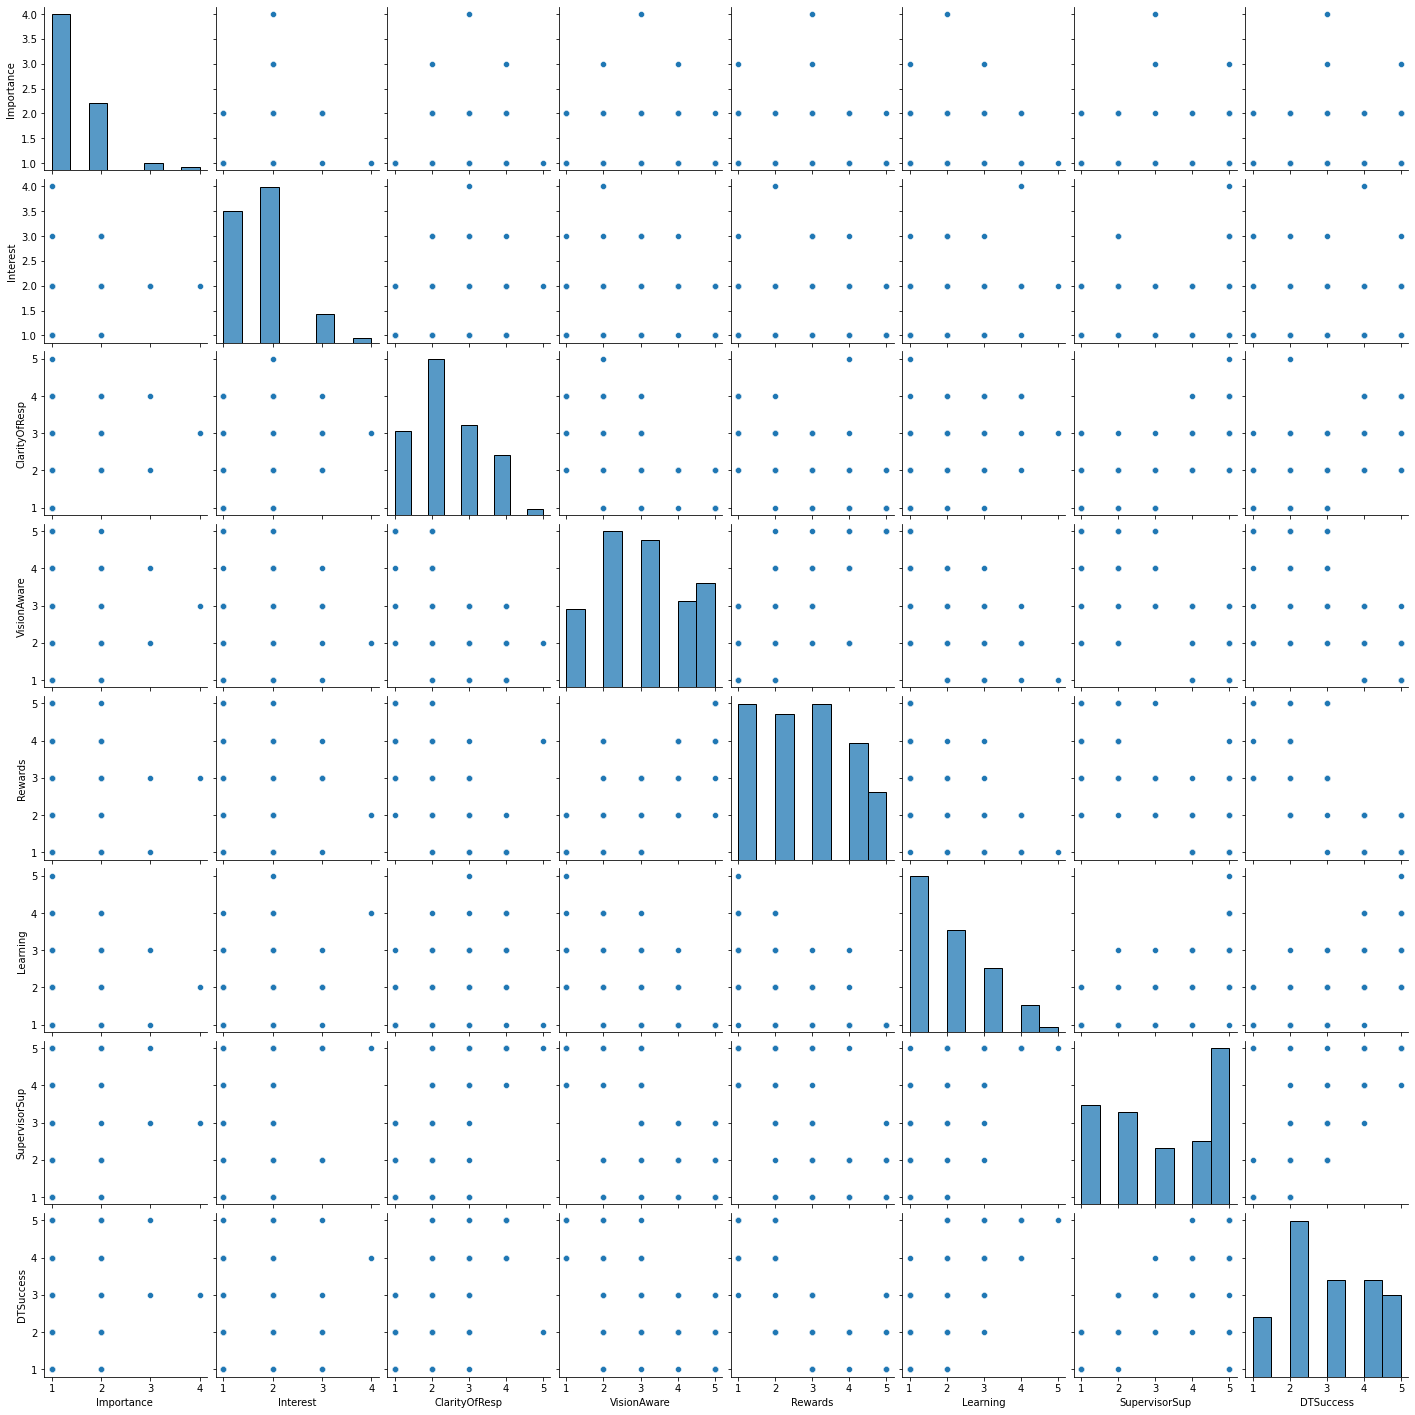

In [11]:
sns.pairplot(dtsuccess)
plt.show()

## Step 3: Data Preparation

In [12]:
# Check the dtsuccess dataframe now

dtsuccess.head()

,Importance,Interest,ClarityOfResp,VisionAware,Rewards,Learning,SupervisorSup,DTSuccess
0,2,3,2,2,3,2,5,1
1,2,3,3,3,3,2,5,2
2,1,2,2,3,2,1,4,2
3,2,3,3,3,3,2,5,1
4,2,1,3,2,1,3,4,4


In [13]:
# Now let's see the head of our dataframe.

dtsuccess.head()

,Importance,Interest,ClarityOfResp,VisionAware,Rewards,Learning,SupervisorSup,DTSuccess
0,2,3,2,2,3,2,5,1
1,2,3,3,3,3,2,5,2
2,1,2,2,3,2,1,4,2
3,2,3,3,3,3,2,5,1
4,2,1,3,2,1,3,4,4


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [14]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dtsuccess, train_size = 0.7, test_size = 0.3, random_state = 10)

In [15]:
df_train.head()

,Importance,Interest,ClarityOfResp,VisionAware,Rewards,Learning,SupervisorSup,DTSuccess
53,1,2,2,2,3,1,2,3
10,2,2,3,2,4,1,1,2
46,1,2,2,4,4,1,2,2
44,2,2,2,5,5,1,2,3
35,2,1,4,1,1,2,5,5


In [16]:
df_train.describe()

,Importance,Interest,ClarityOfResp,VisionAware,Rewards,Learning,SupervisorSup,DTSuccess
count,46.000000,46.000000,46.000000,46.000000,46.00000,46.000000,46.000000,46.000000
mean,1.413043,1.630435,2.369565,3.108696,2.73913,1.891304,3.217391,3.021739
std,0.685601,0.741131,1.018903,1.337132,1.34056,0.993943,1.590430,1.238083
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,2.000000,2.00000,1.000000,2.000000,2.000000
50%,1.000000,1.500000,2.000000,3.000000,3.00000,2.000000,3.000000,3.000000
75%,2.000000,2.000000,3.000000,4.000000,4.00000,2.750000,5.000000,4.000000
max,4.000000,4.000000,4.000000,5.000000,5.00000,4.000000,5.000000,5.000000


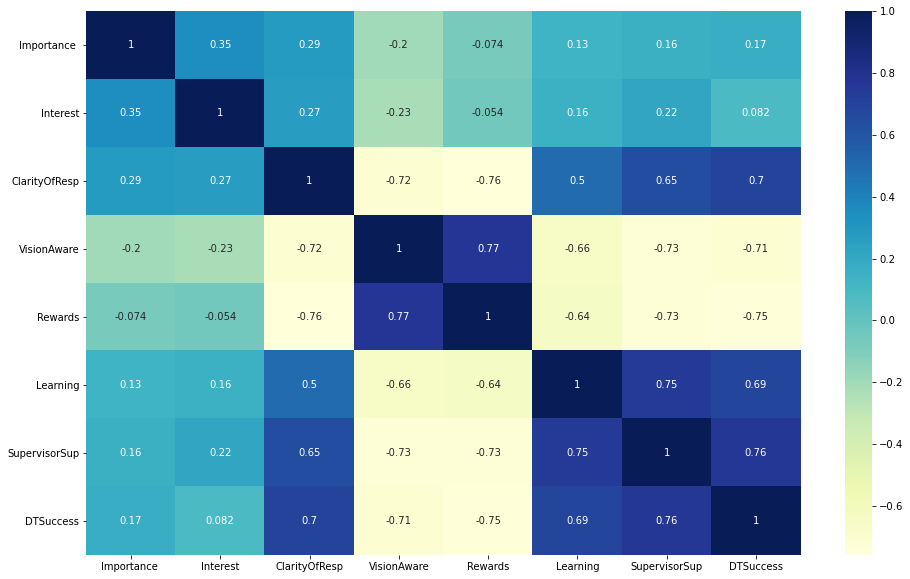

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

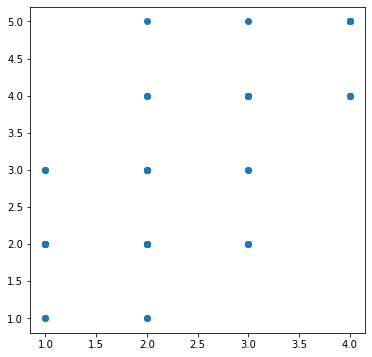

In [18]:
plt.figure(figsize=[6,6])
plt.scatter(df_train. ClarityOfResp, df_train. DTSuccess)
plt.show()

So, we pick `area` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [19]:
y_train = df_train.pop('ClarityOfResp')
X_train = df_train

### Adding all the variables to the model

In [24]:
# Check all the columns of the dataframe

dtsuccess.columns

Index(['Importance ', 'Interest', 'ClarityOfResp', 'VisionAware', 'Rewards',
       'Learning', 'SupervisorSup', 'DTSuccess'],
      dtype='object')

In [25]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            2.814582
Importance       0.195747
Interest         0.219851
VisionAware     -0.134034
Rewards         -0.378703
Learning        -0.184832
SupervisorSup    0.017385
DTSuccess        0.220919
dtype: float64

In [26]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:          ClarityOfResp   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     12.62
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           3.11e-08
Time:                        03:49:47   Log-Likelihood:                -37.998
No. Observations:                  46   AIC:                             92.00
Df Residuals:                      38   BIC:                             106.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8146      0.777      3.623

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [27]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,SupervisorSup,17.60
6,DTSuccess,17.12
3,Rewards,15.15
2,VisionAware,14.53
4,Learning,11.48
1,Interest,7.19
0,Importance,6.25


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [30]:
y_train_price = lr_1.predict(X_train_lm)

Text(0.5, 0, 'Errors')

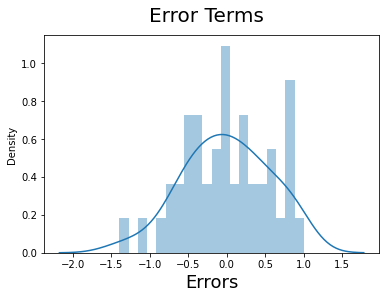

In [31]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [33]:
df_test.describe()

,Importance,Interest,ClarityOfResp,VisionAware,Rewards,Learning,SupervisorSup,DTSuccess
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.35000,1.900000,2.350000,2.650000,2.550000,2.050000,3.100000,2.850000
std,0.48936,0.552506,1.089423,1.225819,1.276302,1.145931,1.618967,1.460894
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.00000,2.000000,2.000000,2.000000,1.750000,1.000000,1.750000,2.000000
50%,1.00000,2.000000,2.000000,2.500000,2.000000,2.000000,4.000000,2.500000
75%,2.00000,2.000000,3.000000,4.000000,4.000000,3.000000,4.250000,4.000000
max,2.00000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Dividing into X_test and y_test

In [34]:
y_test = df_test.pop('ClarityOfResp')
X_test = df_test

In [35]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [37]:
# Making predictions using the fourth model

y_pred_m4 = lr_1.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

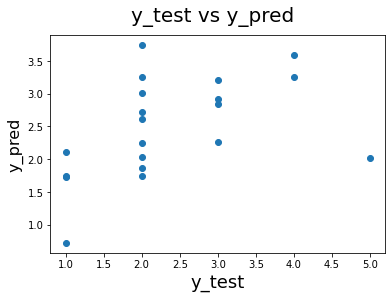

In [38]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test, y_pred_m4)

0.14304646182886782

### Using Decision Trees

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
dt = DecisionTreeRegressor(random_state= 22, max_depth=5, min_samples_leaf=2)

In [68]:
np.random.seed(0)
df_train, df_test = train_test_split(dtsuccess, train_size=0.7, random_state=22)

In [69]:
df_train.shape, df_test.shape

((46, 8), (20, 8))

In [70]:
df_test.head()

,Importance,Interest,ClarityOfResp,VisionAware,Rewards,Learning,SupervisorSup,DTSuccess
64,2,2,2,4,3,1,1,1
26,1,2,2,1,1,2,4,5
28,2,2,2,1,2,3,5,5
12,1,1,1,5,4,1,1,2
6,1,1,1,2,4,1,1,2


In [71]:
df_train.DTSuccess.describe()

count    46.000000
mean      3.043478
std       1.298829
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: DTSuccess, dtype: float64

In [72]:
y_train = df_train.pop("DTSuccess")
X_train = df_train

y_test = df_test.pop("DTSuccess")
X_test = df_test

In [73]:
X_test.shape, X_train.shape

((20, 7), (46, 7))

#### Fit the DT model

In [74]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, random_state=22)

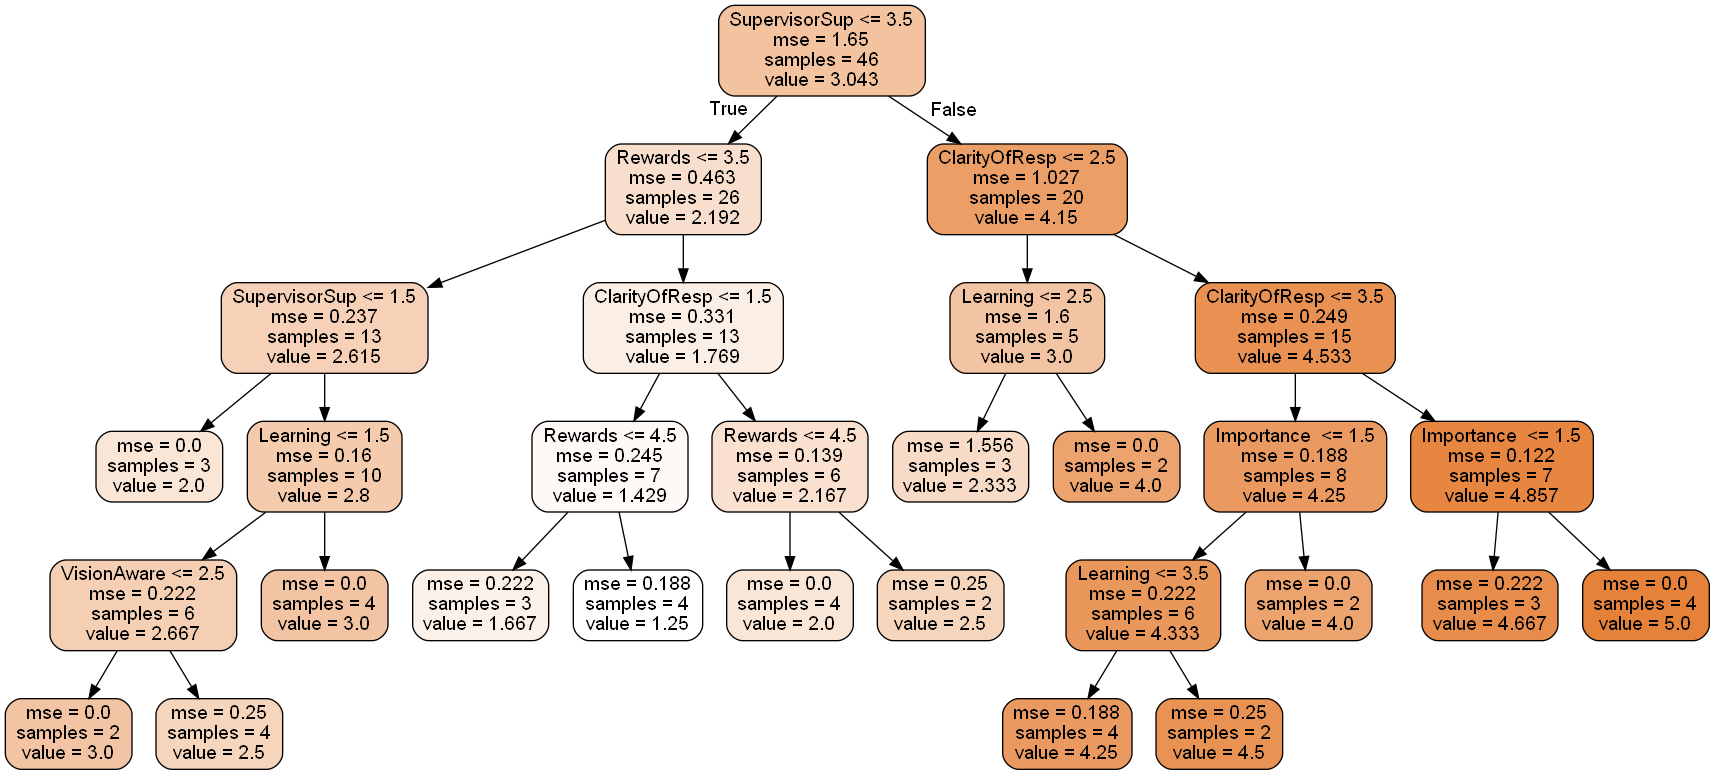

In [75]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [76]:
y_train_pred = dt.predict(X_train)

In [77]:
r2_score(y_train, y_train_pred)

0.8748568155784651

In [78]:
y_test_pred = dt.predict(X_test)

In [79]:
r2_score(y_test, y_test_pred)

-0.14750669344042855

### Using Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rf = RandomForestRegressor(random_state=18, n_jobs=-1, max_depth=5, min_samples_leaf=2)

In [105]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_jobs=-1,
                      random_state=18)

In [106]:
sample_tree = rf.estimators_[21]

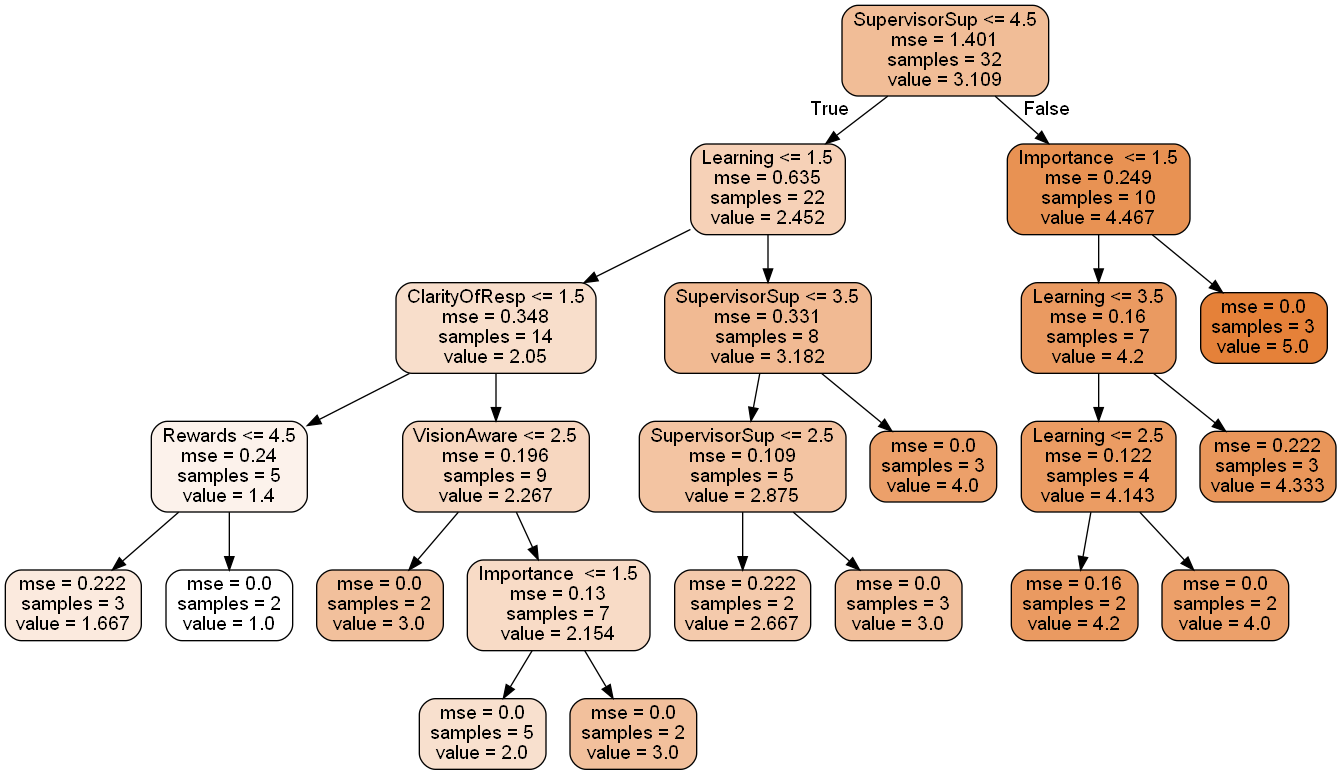

In [107]:
dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [108]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [109]:
r2_score(y_train, y_train_pred)

0.8786280026522175

In [110]:
r2_score(y_test, y_test_pred)

0.32639009726342316

In [111]:
rf.feature_importances_

array([0.01695979, 0.01457852, 0.14052735, 0.02677391, 0.18675072,
       0.2160347 , 0.39837502])

In [112]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_})

In [113]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
6,SupervisorSup,0.398375
5,Learning,0.216035
4,Rewards,0.186751
2,ClarityOfResp,0.140527
3,VisionAware,0.026774
0,Importance,0.016960
1,Interest,0.014579
